In [1]:
%load_ext autoreload
%autoreload 2

# Are the commuters OK?
This is to investigate if commuter infections are different when we assume perfect commuting vs random commuting.

In [2]:
from model import simulate
import numpy as np
from analysis import filter_population, simulate_batch
import matplotlib.pyplot as plt
import matplotlib as mpl
from copy import deepcopy
from grab_data import get_matrix, get_population_sizes

mpl.rcParams['figure.dpi'] = 180

In [3]:
flow_matrix = get_matrix()
pop_sizes = get_population_sizes()
commuter_sizes = pop_sizes.copy()
home_size = pop_sizes.copy()

In [22]:
base_params = dict(beta=2.5, psi=0.8, gamma=0.2, pop_sizes=pop_sizes, od_matrix=flow_matrix, )
random_sim = simulate(**base_params, model='random_oneway', delta=1, t_max=120)
perfect_sim = simulate(**base_params, model='perfect_oneway', delta=1, t_max=120)

In [25]:
len(random_sim)

4

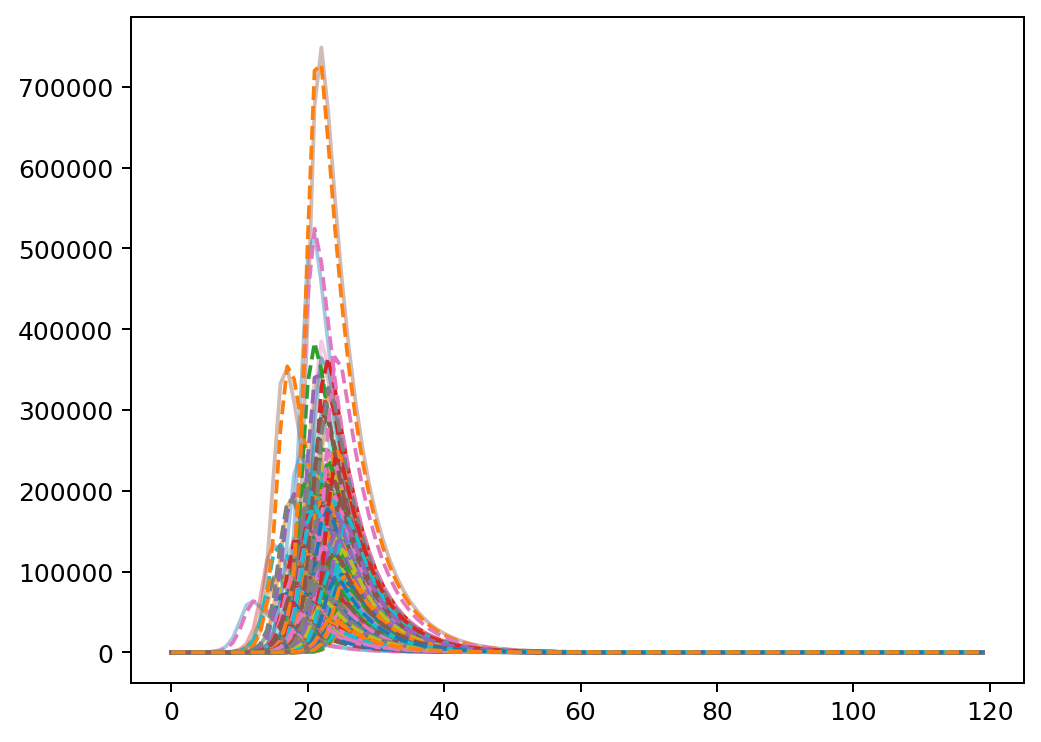

In [24]:
plt.plot(perfect_sim[1].sum(axis=2), alpha=0.4)
plt.plot(random_sim[1].sum(axis=2), linestyle='--')
plt.show()

In [11]:
c_perfect_s, c_perfect_i, _ = filter_population(perfect_sim)
h_perfect_s, h_perfect_i, _ = filter_population(perfect_sim, commuters=False)
c_random_s, c_random_i, _ = filter_population(random_sim)
h_random_s, h_random_i, _ = filter_population(random_sim, commuters=False)
time = perfect_sim[3]

In [12]:
c_perfect_final_sizes = (commuter_sizes - c_perfect_s[-1, :]) / commuter_sizes
c_random_final_sizes = (commuter_sizes - c_random_s[-1, :]) / commuter_sizes
h_perfect_final_sizes = (home_size - h_perfect_s[-1, :]) / home_size
h_random_final_sizes = (home_size - h_random_s[-1, :]) / home_size


How does final size look different between commuters and noncommuters? So we'd normalise by the group population in both cases.

In [16]:
c_perfect_final_sizes

(346,)

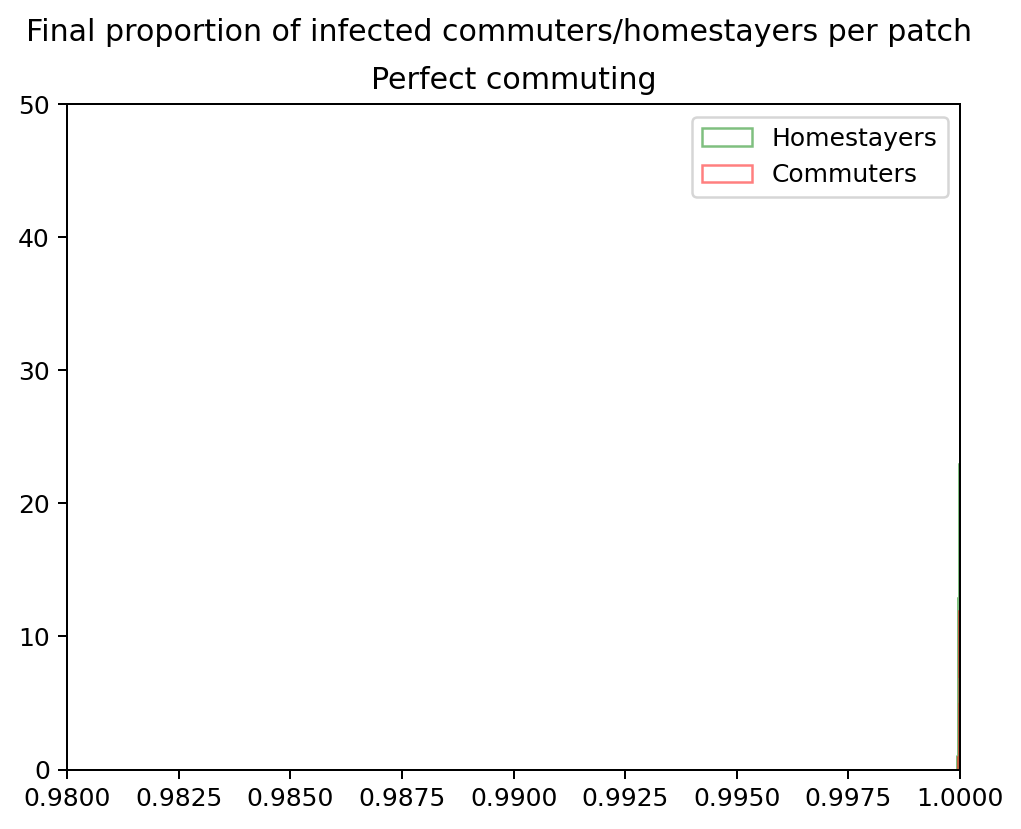

In [14]:
plt.hist(h_perfect_final_sizes,bins=50, label='Homestayers', alpha=0.5, color='g', histtype='step')
plt.hist(c_perfect_final_sizes,bins=50, label='Commuters', alpha=0.5, color='r', histtype='step')
plt.suptitle('Final proportion of infected commuters/homestayers per patch')
plt.title('Perfect commuting')
plt.xlim(0.98,1)
plt.ylim(0,50)
plt.legend()
plt.show()

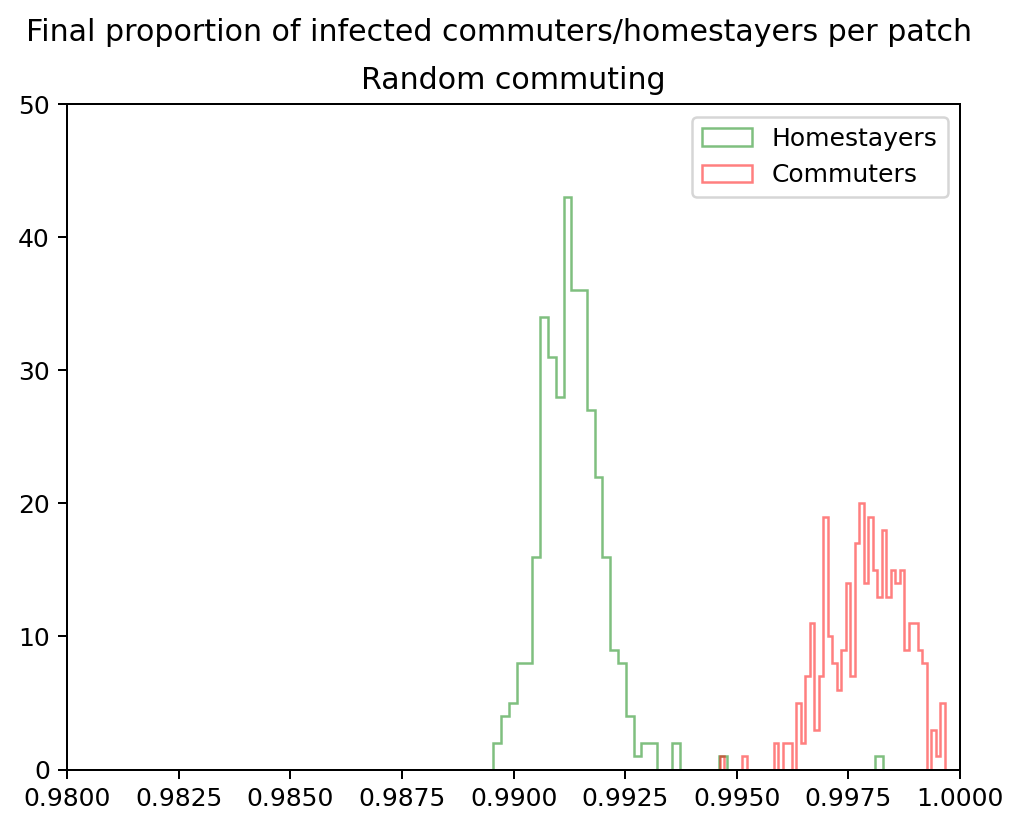

In [379]:
plt.hist(h_random_final_sizes,bins=50, label='Homestayers', alpha=0.5, color='g', histtype='step')
plt.hist(c_random_final_sizes, bins=50, label='Commuters', alpha=0.5, color='r', histtype='step')
plt.suptitle('Final proportion of infected commuters/homestayers per patch')
plt.title('Random commuting')
plt.xlim(0.98,1)
plt.ylim(0,50)
plt.legend()
plt.show()

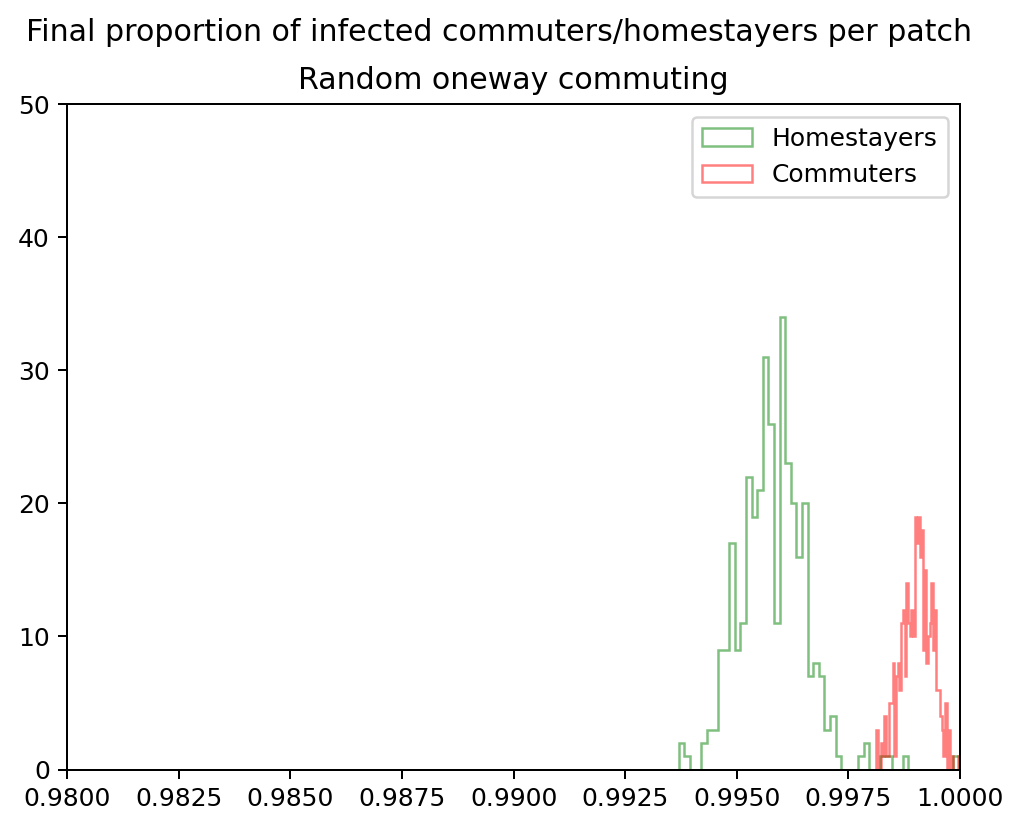

In [381]:
plt.hist(h_oneway_final_sizes,bins=50, label='Homestayers', alpha=0.5, color='g', histtype='step')
plt.hist(c_oneway_final_sizes, bins=50, label='Commuters', alpha=0.5, color='r', histtype='step')
plt.suptitle('Final proportion of infected commuters/homestayers per patch')
plt.title('Random oneway commuting')
plt.xlim(0.98,1)
plt.ylim(0,50)
plt.legend()
plt.show()

Running a few times varies things a bit, maybe let's run it a load of times and show mean and variance of each bin. Then if one simulation varies a lot more than the other at points we can look at that patch and try and figure out what's going on?

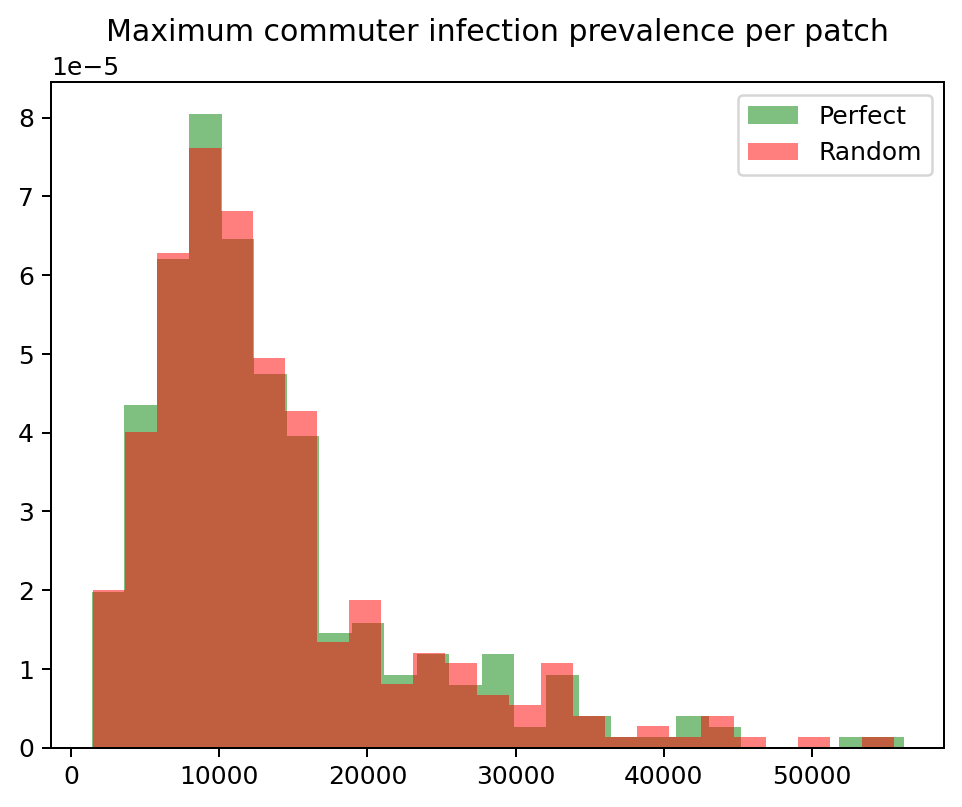

In [367]:
plt.hist(np.max(c_perfect_i, axis=0), density=True, bins=25, label='Perfect', alpha=0.5, color='g')
plt.hist(np.max(c_random_i, axis=0), density=True, bins=25, label='Random', alpha=0.5, color='r')
plt.legend()
plt.title('Maximum commuter infection prevalence per patch')
plt.show()

In [368]:
samples = 20
peak_perfect_infections = np.zeros(shape=(samples, pop_sizes.size))
peak_random_infections = np.zeros(shape=(samples, pop_sizes.size))

for i in range(samples):
    perfect_sim = simulate(beta=2.5, psi=0.8, gamma=0.4, pop_sizes=pop_sizes, od_matrix=flow_matrix)
    random_sim = simulate(beta=2.5, psi=0.8, gamma=0.4, pop_sizes=pop_sizes, od_matrix=flow_matrix, perfect=False)
    while perfect_sim[1].sum(axis=(0, 1, 2)) <= 100 or random_sim[1].sum(axis=(0, 1, 2)) <= 100:
        perfect_sim = simulate(beta=2.5, psi=0.8, gamma=0.4, pop_sizes=pop_sizes, od_matrix=flow_matrix)
        random_sim = simulate(beta=2.5, psi=0.8, gamma=0.4, pop_sizes=pop_sizes, od_matrix=flow_matrix, perfect=False)
    c_perfect_i = deepcopy(perfect_sim[1])
    c_random_i = deepcopy(random_sim[1])
    np.einsum('nii->ni', c_random_i)[...] = 0
    np.einsum('nii->ni', c_perfect_i)[...] = 0
    random_commuter_i = c_random_i.sum(axis=2)
    perfect_commuter_i = c_perfect_i.sum(axis=2)
    peak_random_infections[i, :] = np.max(random_commuter_i, axis=0) / pop_sizes
    peak_perfect_infections[i, :] = np.max(perfect_commuter_i, axis=0) / pop_sizes

TypeError: simulate() got an unexpected keyword argument 'perfect'

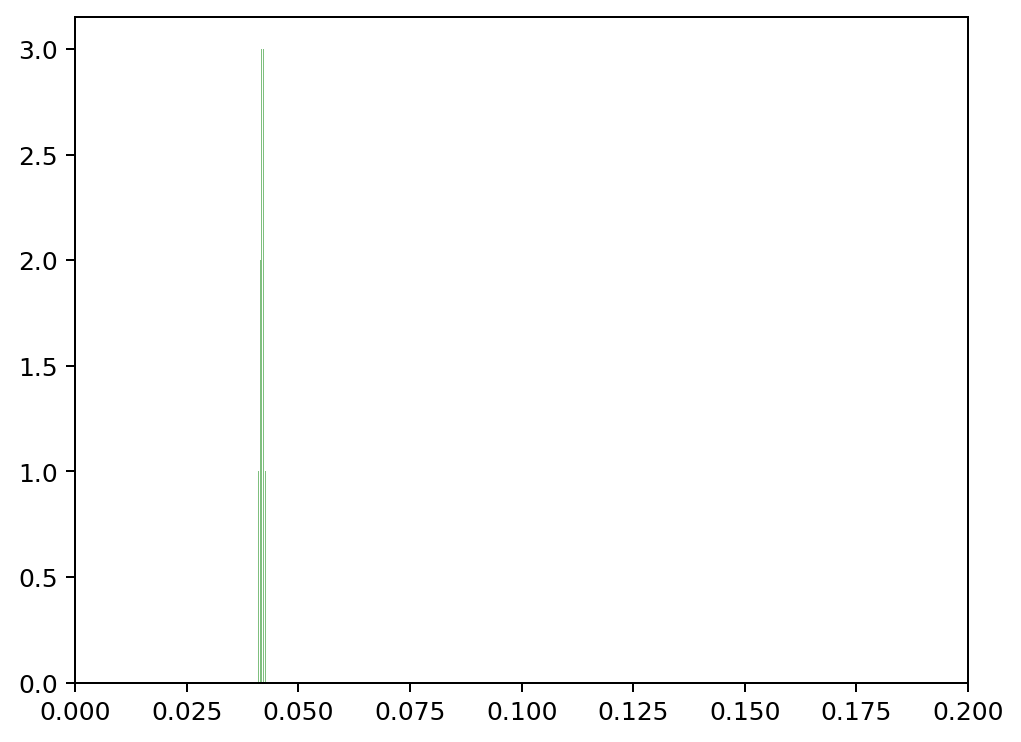

In [201]:
plt.hist(peak_perfect_infections[:, 300], bins=25, label='Perfect', alpha=0.5, color='g')
plt.xlim(0, 0.2)
plt.show()

[autoreload of analysis failed: Traceback (most recent call last):
  File "/opt/miniconda3/envs/abm/lib/python3.12/site-packages/IPython/extensions/autoreload.py", line 276, in check
    superreload(m, reload, self.old_objects)
  File "/opt/miniconda3/envs/abm/lib/python3.12/site-packages/IPython/extensions/autoreload.py", line 475, in superreload
    module = reload(module)
             ^^^^^^^^^^^^^^
  File "/opt/miniconda3/envs/abm/lib/python3.12/importlib/__init__.py", line 131, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 866, in _exec
  File "<frozen importlib._bootstrap_external>", line 995, in exec_module
  File "<frozen importlib._bootstrap_external>", line 1133, in get_code
  File "<frozen importlib._bootstrap_external>", line 1063, in source_to_code
  File "<frozen importlib._bootstrap>", line 488, in _call_with_frames_removed
  File "/Users/joel/PycharmProjects/Commuters/day_and_night/analysis.py", line 20
    s_commuter = s.sum(

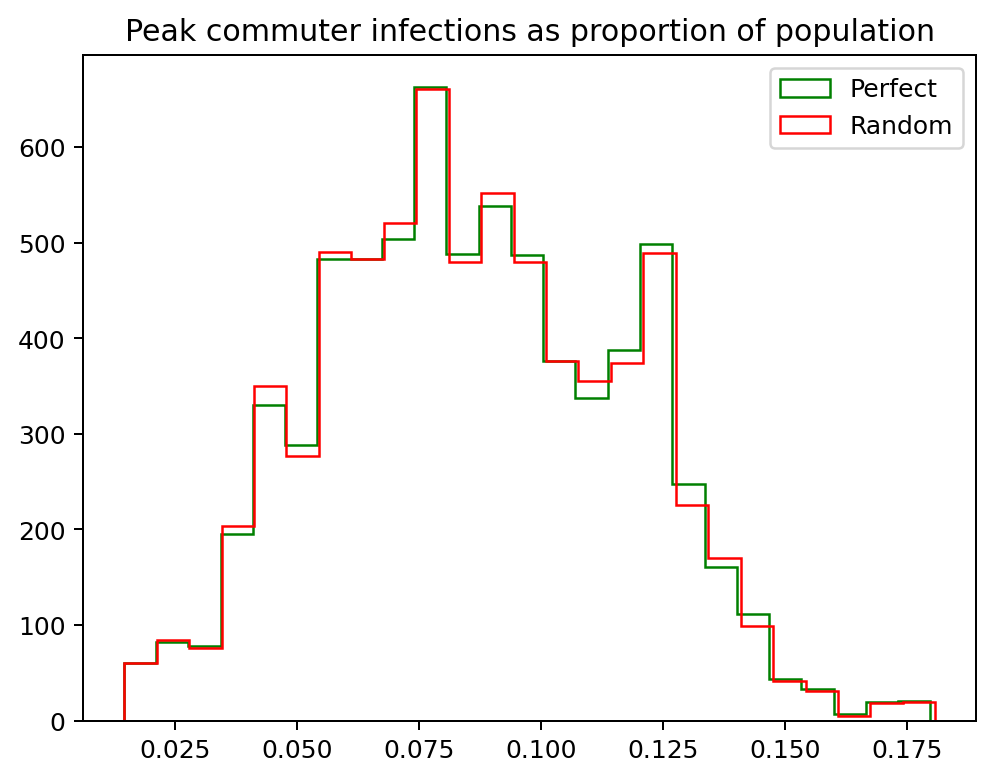

In [203]:
plt.hist(peak_perfect_infections.flatten(), histtype='step', bins=25, label='Perfect', color='g')
plt.hist(peak_random_infections.flatten(), histtype='step', bins=25, label='Random', color='r')
plt.legend()
plt.title('Peak commuter infections as proportion of population')
plt.show()